# CPU features Histograms

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json, as_json,plot_histogram  # for json files and plots
# from sklearn.model_selection import train_test_split
import numpy as np

In [43]:
# read data
data = pd.read_csv("data_sample.csv")
id_nan = data.event.isna()
id_cpu = data.loc[~id_nan]["event"].map(lambda x: "cpu" in x)
cpu_values = data.loc[id_cpu]["system"].map(lambda x: as_json(x))
cpu_cores      = cpu_values.map(lambda x: x["cpu"]["cores"]        ).to_numpy()

# normalize values between (0,1)
cpu_user_pct   = cpu_values.map(lambda x: x["cpu"]["user"]["pct"]  ).to_numpy() / cpu_cores
cpu_idle_pct   = cpu_values.map(lambda x: x["cpu"]["idle"]["pct"]  ).to_numpy() / cpu_cores
cpu_system_pct = cpu_values.map(lambda x: x["cpu"]["system"]["pct"]).to_numpy() / cpu_cores
cpu_df = pd.DataFrame(np.array([cpu_cores, cpu_user_pct, cpu_idle_pct, cpu_system_pct]).T,
             columns = ["cores", "user_pct", "idle_pct", "system_pct"],
             index = cpu_values.index)

# save dframe
cpu_df.to_csv("cpu_df.csv")

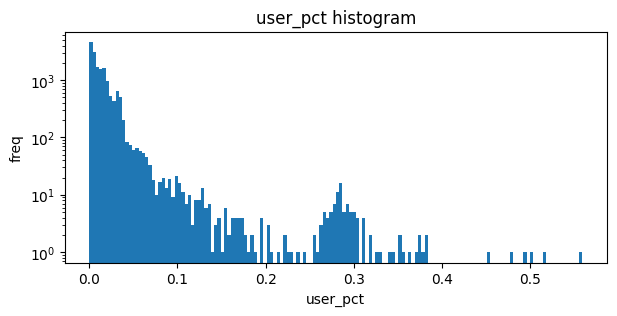

In [38]:
fig = plot_histogram(cpu_df.user_pct, bns=150, logscale=True)

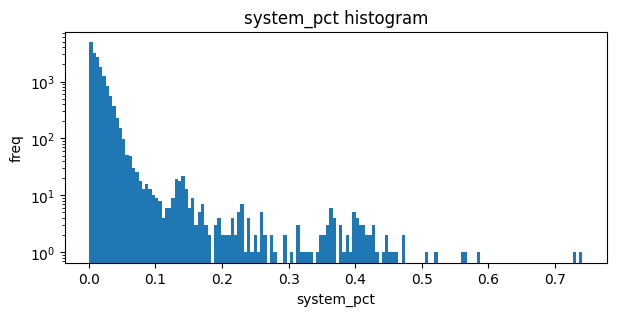

In [39]:
fig = plot_histogram(cpu_df.system_pct, bns=150, logscale=True)

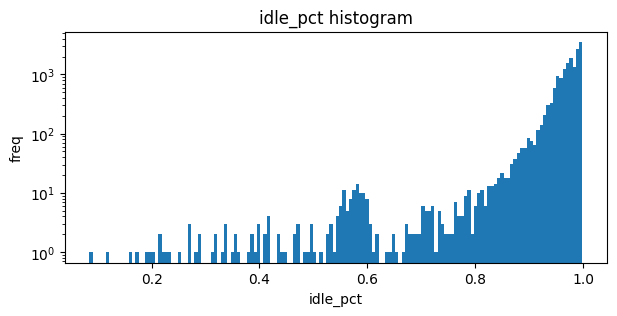

In [40]:
fig = plot_histogram(cpu_df.idle_pct, bns=150, logscale=True)

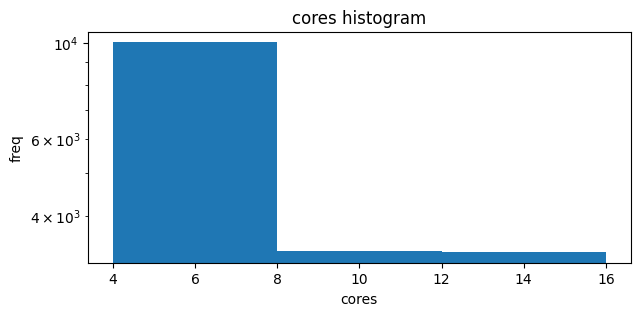

In [41]:
fig = plot_histogram(cpu_df.cores, bns=3, logscale=True)# should be 3 bins

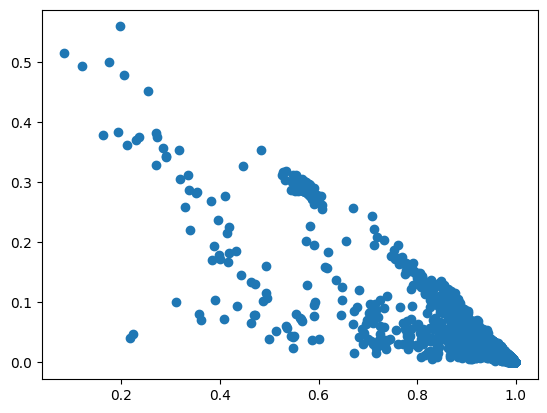

In [42]:
# cpu_df_sorted = cpu_df.sort_values(by="cores")
# plt.scatter(cpu_df_sorted.cores, cpu_df_sorted.user_pct)
plt.scatter(cpu_df.idle_pct, cpu_df.user_pct)